In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
os.chdir("/Users/zyxu/Documents/R/23spring")

from tools.pre_visz import pre_visz

In [14]:
study_decompositions, study_decompositions_traditional, sim_study_groundTruth_Us, sim_study_ground_truth_V, optimized_V = pre_visz(
        matrix_data_path = "./dataset/simulation/avg_prop_5/sim_matrix_data.csv", 
        study_names_path = "./dataset/simulation/avg_prop_5/sim_study_name.csv",
        study_ground_truth_path_Us  = "./dataset/simulation/avg_prop_5/Us.json",
        study_ground_truth_path_V = "./dataset/simulation/avg_prop_5/V.json",
        optimized_V_path = "./output/sim/best_V.pt")
unique_studies = study_decompositions.keys()

(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20


In [3]:
np.array(sim_study_groundTruth_Us['A']).shape

(100, 20)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample study

def plot_study_U(study):
    U_study = study_decompositions[study][0]
    U_study_traditional = study_decompositions_traditional[study][0]
    # U_difference = U_study - U_study_traditional
    U_groundTruth = np.array(sim_study_groundTruth_Us[study])

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Heatmap of U from study_decompositions
    sns.heatmap(U_study, ax=axes[0], cmap='coolwarm', cbar=False)
    axes[0].set_title('U from study_decompositions')

    # Heatmap of U from study_decompositions_traditional
    sns.heatmap(U_study_traditional, ax=axes[1], cmap='coolwarm', cbar=False)
    axes[1].set_title('U from study_decompositions_traditional')

    # Ground truth U
    sns.heatmap(U_groundTruth, ax=axes[2], cmap='coolwarm')
    axes[2].set_title('Ground truth U matrices')

    # Heatmap of the difference
    # sns.heatmap(U_difference, ax=axes[2], cmap='coolwarm')
    # axes[2].set_title('Difference between U matrices')



    plt.tight_layout(pad=1.0)
    plt.show()

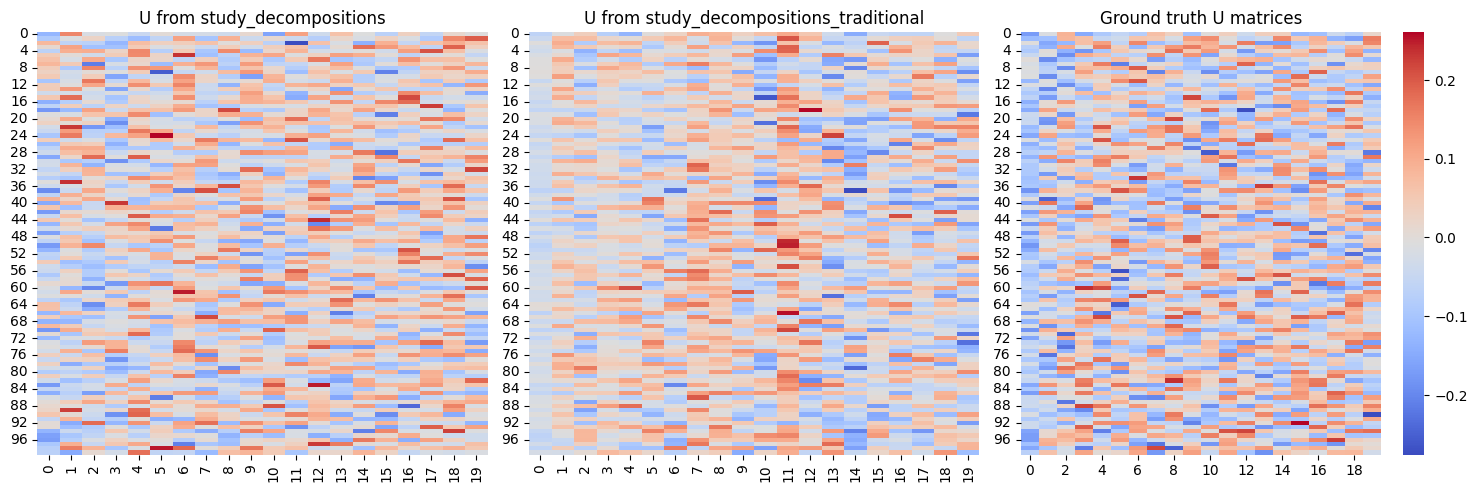

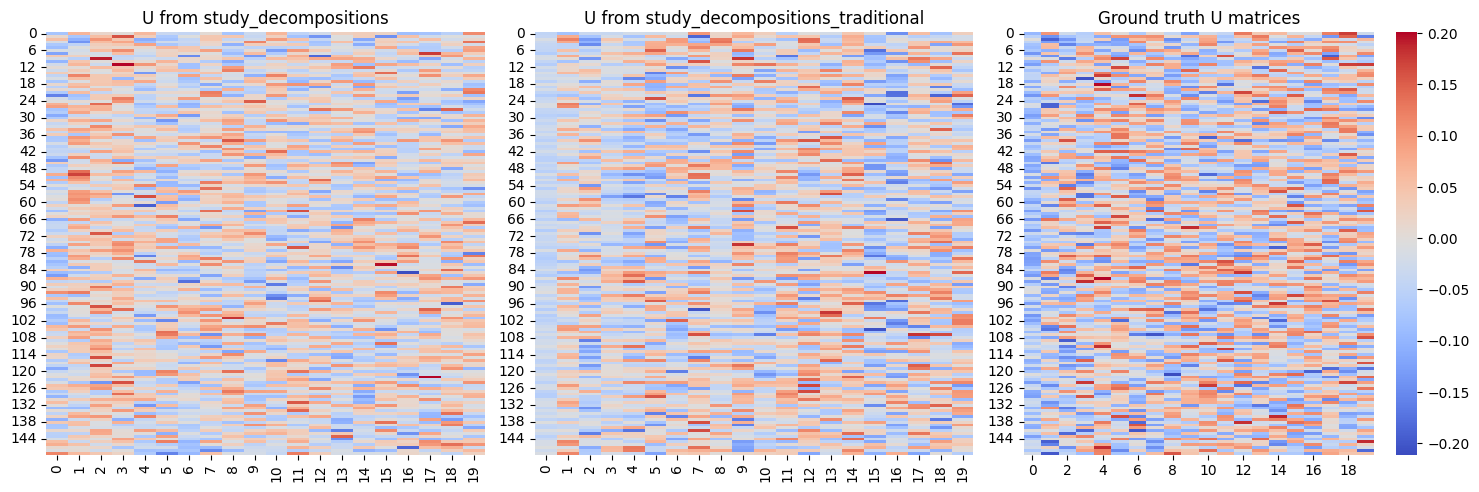

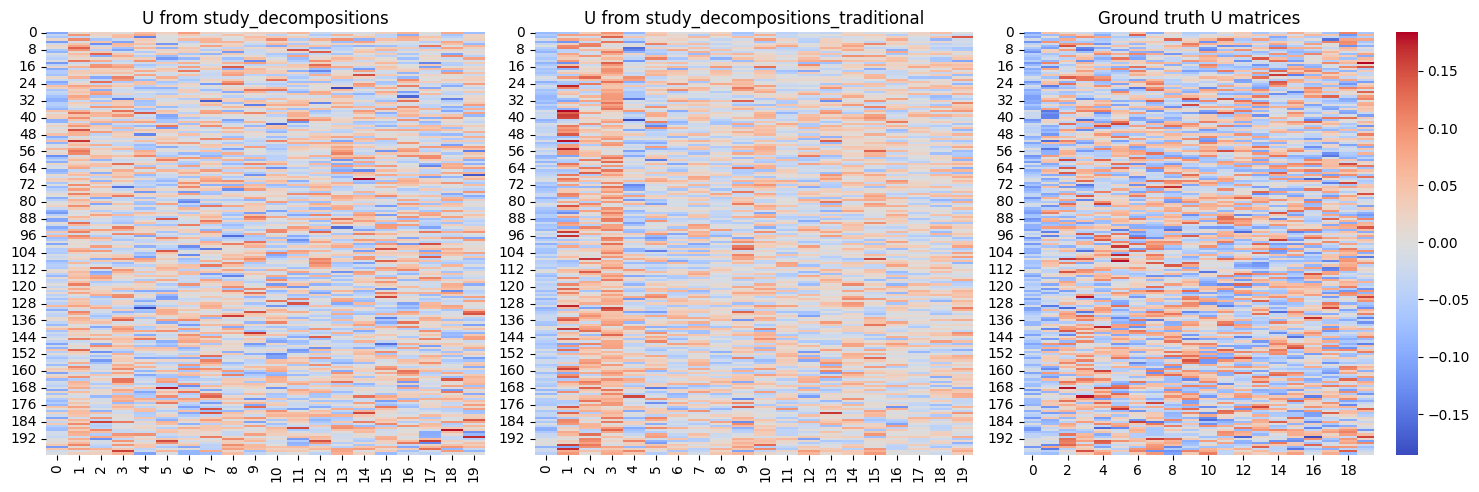

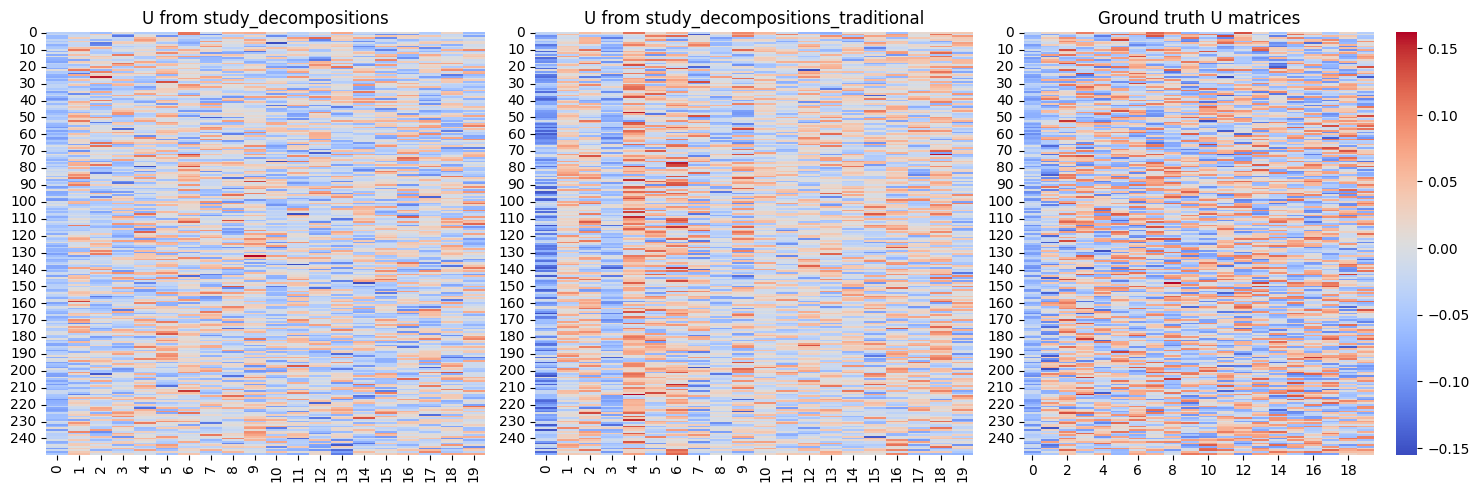

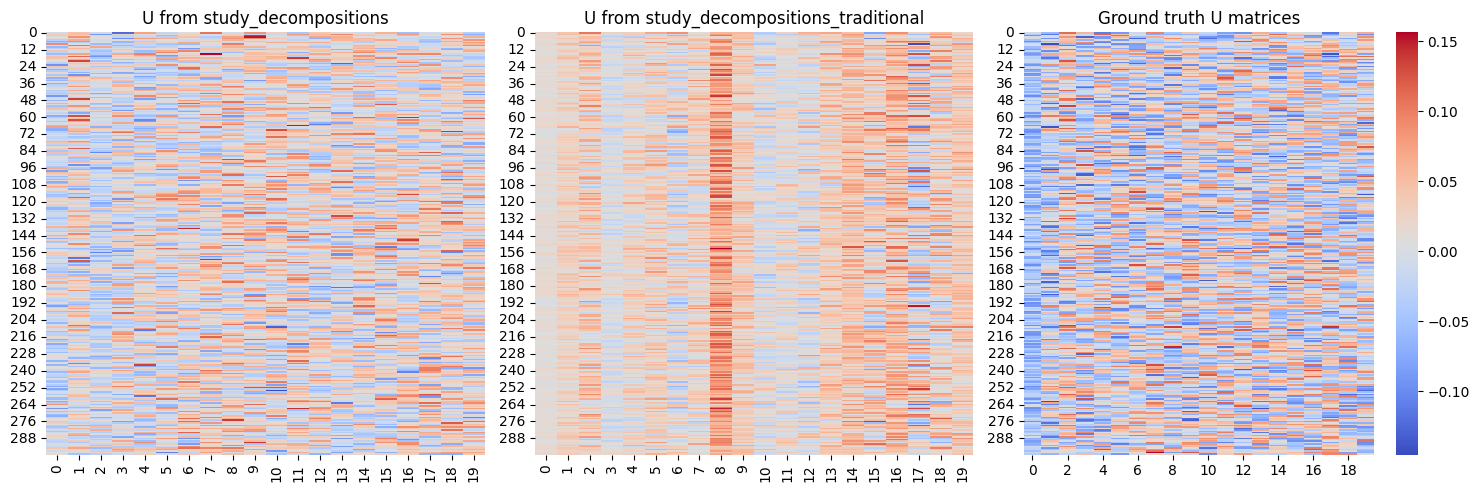

In [5]:
for study in unique_studies:
    plot_study_U(study)

In [26]:
from collections import defaultdict 

def com_loss(study):
    U_study = study_decompositions[study][0]
    U_study_traditional = study_decompositions_traditional[study][0]
    # U_difference = U_study - U_study_traditional
    U_groundTruth = np.array(sim_study_groundTruth_Us[study])
    # Compute difference matrices
    diff_U_study = U_study - U_groundTruth
    diff_U_study_traditional = U_study_traditional - U_groundTruth

    # Compute Frobenius norms
    norm_U_study = np.linalg.norm(diff_U_study, 'fro')
    norm_U_study_traditional = np.linalg.norm(diff_U_study_traditional, 'fro')

    print(f"Frobenius norm of the difference between U_study and U_groundTruth: {norm_U_study}")
    print(f"Frobenius norm of the difference between U_study_traditional and U_groundTruth: {norm_U_study_traditional}")

    return norm_U_study, norm_U_study_traditional
loss = defaultdict(list)

for study in unique_studies:
    loss["study"].append(study)
    norm_U_study, norm_U_study_traditional = com_loss(study)
    loss["ours"].append(norm_U_study)
    loss["SVD"].append(norm_U_study_traditional)

import pandas as pd
pd.DataFrame(loss)

Frobenius norm of the difference between U_study and U_groundTruth: 6.194328453338931
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 5.038492823790812
Frobenius norm of the difference between U_study and U_groundTruth: 6.381962388421599
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 4.590960915680247
Frobenius norm of the difference between U_study and U_groundTruth: 6.4871828606744035
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 4.962661487850299
Frobenius norm of the difference between U_study and U_groundTruth: 6.300938201379446
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 4.637528999889218
Frobenius norm of the difference between U_study and U_groundTruth: 6.190217697290253
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 4.698748242383937


,study,ours,SVD
0,A,6.194328,5.038493
1,B,6.381962,4.590961
2,C,6.487183,4.962661
3,D,6.300938,4.637529
4,E,6.190218,4.698748


In [27]:
# study_decompositions_traditional['A'][2] - study_decompositions_traditional['B'][2]
# optimized_V.detach().numpy().shape
# study_decompositions_traditional['A'][2].shape
# np.array(sim_study_ground_truth_V['V']).shape

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample study

def plot_study_V(optimized_V, study_decompositions_traditional, sim_study_ground_truth_V):
    V_study = optimized_V.detach().numpy() 
    V_study_traditional = study_decompositions_traditional['A'][2] # any study will work
    # U_difference = U_study - U_study_traditional
    # print(optimized_V)
    # print(sim_study_ground_truth_V)
    if isinstance(sim_study_ground_truth_V, dict):
        sim_study_ground_truth_V = sim_study_ground_truth_V['V']
    V_groundTruth = np.array(sim_study_ground_truth_V)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Heatmap of U from study_decompositions
    sns.heatmap(V_study, ax=axes[0], cmap='coolwarm', cbar=False)
    axes[0].set_title('V from study_decompositions')

    # Heatmap of U from study_decompositions_traditional
    sns.heatmap(V_study_traditional, ax=axes[1], cmap='coolwarm', cbar=False)
    axes[1].set_title('V from study_decompositions_traditional')

    # Ground truth U
    sns.heatmap(V_groundTruth, ax=axes[2], cmap='coolwarm')
    axes[2].set_title('Ground truth V matrices')

    # Heatmap of the difference
    # sns.heatmap(U_difference, ax=axes[2], cmap='coolwarm')
    # axes[2].set_title('Difference between U matrices')



    plt.tight_layout(pad=1.0)
    plt.show()

tensor([[-7.7781e-03, -1.7838e-03, -1.3924e-02,  ...,  1.9844e-01,
          9.5761e-03, -1.4130e-01],
        [-1.5703e-03, -5.2783e-02, -1.7983e-02,  ...,  1.7302e-01,
         -2.4924e-01, -2.5474e-02],
        [ 5.9202e-04,  1.5252e-04,  8.4380e-04,  ..., -6.1665e-02,
         -1.8283e-01, -8.4010e-02],
        ...,
        [ 9.1011e-04, -4.6915e-02, -6.8486e-02,  ...,  4.1893e-02,
          2.8361e-01,  4.1838e-02],
        [-1.5340e-06, -2.9675e-05, -1.2205e-03,  ...,  7.0485e-02,
         -1.6805e-01, -1.4456e-01],
        [-6.5560e-03, -4.2395e-02,  2.2085e-02,  ...,  7.3539e-02,
          2.4902e-01, -1.2176e-01]], requires_grad=True)
{'V': [[-0.11484225453006225, 0.02500655756575622, 0.001004775046303294, 0.039605231396808604, 0.006162046054932022, 0.1564455336241697, -0.10820598434065118, 0.015356451097923288, 0.04634143648520428, 0.09931692540105898, -0.08728233039285033, 0.08975002652065567, -0.10766010372742195, -0.00826541458162898, 0.07985178356196765, -0.04349959014285

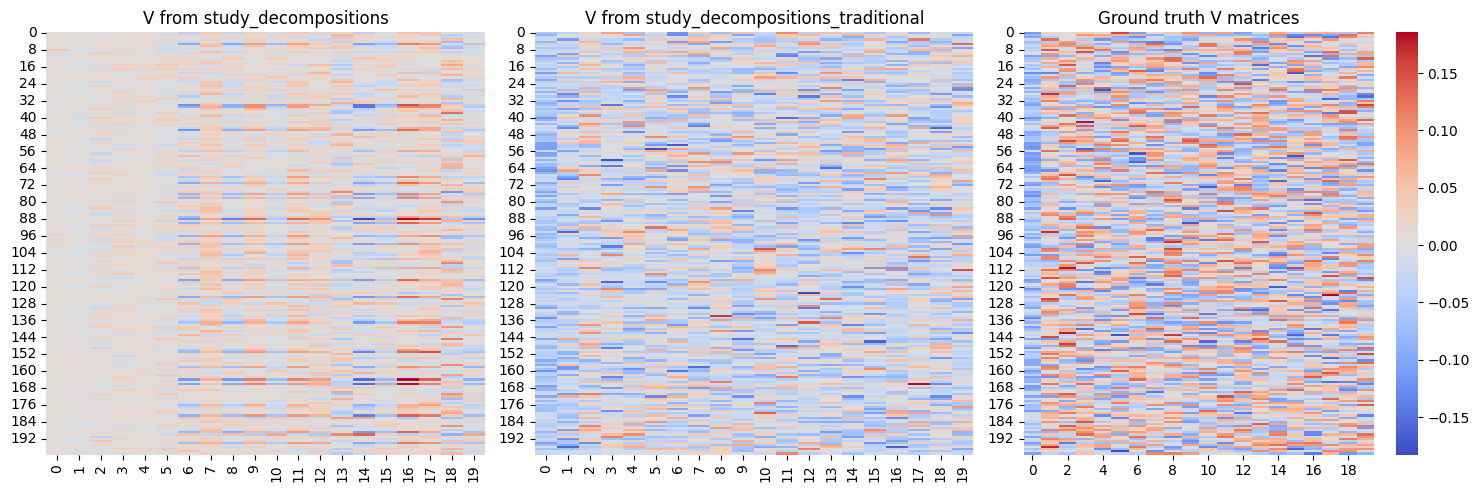

In [25]:
plot_study_V(optimized_V, study_decompositions_traditional, sim_study_ground_truth_V)

In [33]:
len(study_decompositions_traditional['A'])

3

In [35]:
from collections import defaultdict 

def com_loss(optimized_V, study_decompositions_traditional, sim_study_ground_truth_V):
    U_study = optimized_V.detach().numpy()
    U_study_traditional = study_decompositions_traditional[study][2]
    # U_difference = U_study - U_study_traditional
    if isinstance(sim_study_ground_truth_V, dict):
        sim_study_ground_truth_V = sim_study_ground_truth_V['V']
    U_groundTruth = np.array(sim_study_ground_truth_V)
    # Compute difference matrices
    diff_U_study = U_study - U_groundTruth
    diff_U_study_traditional = U_study_traditional - U_groundTruth

    # Compute Frobenius norms
    norm_U_study = np.linalg.norm(diff_U_study, 'fro')
    norm_U_study_traditional = np.linalg.norm(diff_U_study_traditional, 'fro')

    print(f"Frobenius norm of the difference between V_study and V_groundTruth: {norm_U_study}")
    print(f"Frobenius norm of the difference between V_study_traditional and V_groundTruth: {norm_U_study_traditional}")

    return norm_U_study, norm_U_study_traditional
norm_V_study, norm_V_study_traditional = com_loss(optimized_V, study_decompositions_traditional, sim_study_ground_truth_V)



Frobenius norm of the difference between V_study and V_groundTruth: 10.704166238063738
Frobenius norm of the difference between V_study_traditional and V_groundTruth: 6.12900288371949
